# Predizione e classificazione di diamanti

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Daniele Di Lillo - `daniele.dilillo@studio.unibo.it` <br>
Riccardo Albertini - `riccardo.albertini4@studio.unibo.it`


## Introduzione
Gli obiettivi della nostra analisi sono predire il prezzo dei diamanti in base ai dati e classificarli accuratamente nei diversi tipi di tagli.

### Caricamento librerie e dati
Vengono importate le librerie necessarie per scaricare i file, organizzare le strutture dati, disegnare i grafici e calcolare i vari modelli.

In [59]:
# setup e test librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix

from sklearn.tree import export_text, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold
from sklearn.kernel_approximation import Nystroem
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from prettytable import PrettyTable

%matplotlib inline

In [60]:
#Load dataset
diamonds = pd.read_csv('https://raw.githubusercontent.com/rikiAlbertini/progettoDataSet/main/diamonds.csv',index_col=[0])

###Feature del dataset###
Di seguito sono riportate le feature con una breve descrizione:

* **price**: prezzo in dollari americani (\$326 -\$18,823)

* **carat**: peso del diamante (0.2--5.01)

* **cut**: qualità del taglio (Fair, Good, Very Good, Premium, Ideal)

* **color**: colore del diamante, da J (peggiore) a D (migliore)

* **clarity**: indice di chiarezza del diamante (I1 (peggiore), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (migliore))

* **x**: lunghezza in mm (0--10.74)

* **y**: larghezza in mm (0--58.9)

* **z**: profindità in mm (0--31.8)

* **depth**: percentuale totale di profondità = z / mean(x, y) = 2 * z / (x + y) (43--79). La profondità è la distanza tra l’apice e la tavola del diamante.

* **table**: larghezza della parte alta del diamante (43--95)

Possiamo vedere un'anteprima del dataframe diamonds ricavato dal file csv e le feature appena elencate.

In [61]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Vediamo la dimensione della tabella diamonds, in particolare il numero di righe e il numero di colonne.

In [62]:
diamonds.shape

(53940, 10)

###Analisi esplorativa generale dei dati###

In questa sezione mostreremo e analizzeremo a fondo i dati a disposizione, preparandoli per le successive fasi di modellazione e progettazione della previsione e classificazione. Iniziamo ad analizzare alcune proprietà delle feature presenti.

In [63]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [64]:
diamonds.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 13.0 MB


Nel dataset alcune variabili categoriche vengono viste come object. Procediamo quindi nell'identificarle in maniera corretta per evitare sprechi di memoria.

In [65]:
diamonds["cut"] = diamonds["cut"].astype("category")
diamonds["color"] = diamonds["color"].astype("category")
diamonds["clarity"] = diamonds["clarity"].astype("category")

In [66]:
diamonds.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


Controlliamo che nel dataset non siano presenti dati nan

In [67]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Non sono presenti valori nan nel dataset ma osservando i valori presenti nel :

```
diamonds.describe()
```
Notiamo che i valori minimi di x,y,z sono 0. Essendo ciò fisicamente impossibile li tratteremo come assenza di valore.


In [68]:
diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)].shape[0]

20

In [69]:
diamonds[['x','y','z']] = diamonds[['x','y','z']].replace(0,np.NaN)
diamonds.isna().any(axis=1).sum()

20

I valori nan sono un numero insignificante rispetto alla dimensione del dataset, decidiamo quindi di scartarli. 

In [70]:
diamonds.dropna(inplace=True)

In [71]:
diamonds.shape

(53920, 10)

In [72]:
diamonds.isna().any(axis=1).sum()

0

In [73]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Vediamo ora un semplice grafico che mostra la correlazione tra le feature presenti nel dataset, ovvero la relazione esistente tra le variabili (correlazione di Pearson).

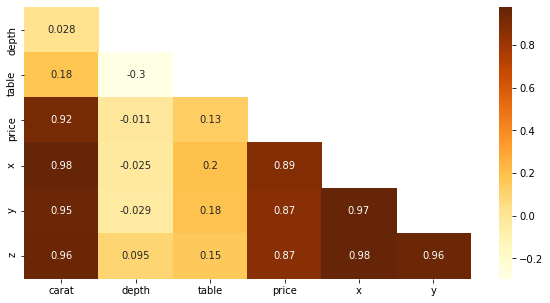

In [74]:
diamonds_Pearson = diamonds.corr(method="pearson")

mask = np.triu(diamonds_Pearson)
mask = mask[1:, :-1]
corr = diamonds_Pearson.iloc[1:,:-1].copy()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, mask=mask, cmap='YlOrBr');

Alcune variabili denotano una forte correlazione tra loro, mentre in altri casi la correlazione è assente. 
Ad esempio i carati sono molto correlati al prezzo (come immaginavamo), ma poco correlati alla percentuale di profondità.
Potremmo procedere all'eliminazione dei dati poco correlati con il prezzo perchè non sono significativi nella regressione.


###Analisi dettagliata delle feature

Analizziamo ora nel dettaglio le feature presenti nel dataset e le loro distribuzioni.
Partiamo dalle feature categoriche:
*   Taglio (**cut**)
*   Colore (**color**)
*   Chiarezza (**clarity**)



**Taglio del diamante** <br>
Il taglio del diamante identifica il tipo di modellazione geometrica del diamante stesso. Sono 6 le possibili qualità del taglio.

In [75]:
diamonds["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

Segue un grafico a torta che rappresenta la distribuzione dei vari tipi di taglio nel dataset. Quelli con taglio ideale sono in numero maggiore rispetto agli altri. Dal boxplot sulla destra possiamo evincere le pricipali caratteristiche(mediana, 25% e 75%) per ogni tipo di taglio. 

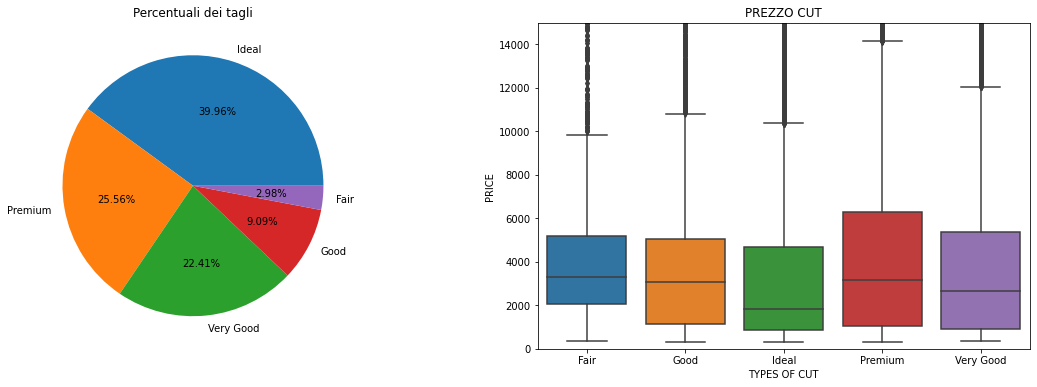

In [76]:
plt.figure(figsize=(30, 6))

diamonds["cut"].value_counts().plot.pie(ax=plt.subplot(1,3,1), autopct='%.2f%%', title="Percentuali dei tagli", ylabel="");

ax = sns.boxplot(x="cut" , y="price", data=diamonds, ax=plt.subplot(1,3,2));
ax.set(xlabel="TYPES OF CUT", ylabel="PRICE");
plt.ylim(0, 15000);
ax.set_title("PREZZO CUT");

Possiamo notare come il prezzo medio si aggiri circa sulla stessa cifra in tutti i tipi di taglio (tranne il taglio Good che ha un valore nettamente inferiore rispetto agli altri).

**Colori** <br>
I colori indicano la tonalità naturale dei diamanti incolori.

In [77]:
diamonds["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['E', 'I', 'J', 'H', 'F', 'G', 'D']

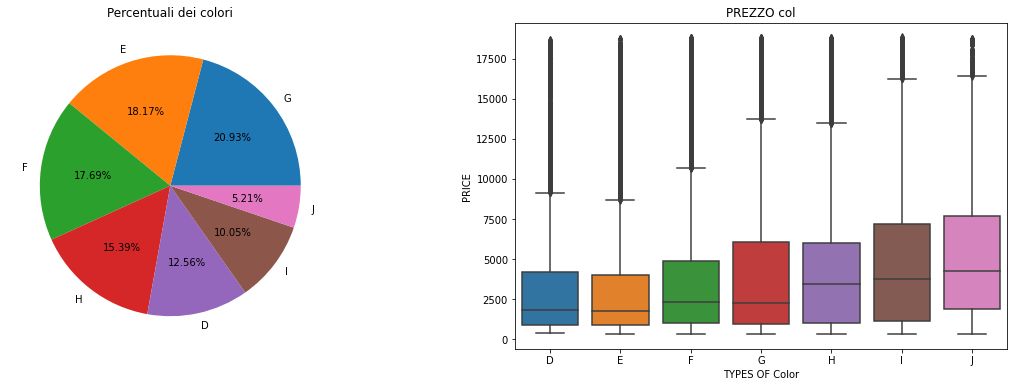

In [78]:
plt.figure(figsize=(30, 6))

diamonds["color"].value_counts().plot.pie(ax=plt.subplot(1,3,1), autopct='%.2f%%', title="Percentuali dei colori", ylabel="");

ax = sns.boxplot(x="color" , y="price", data=diamonds, ax=plt.subplot(1,3,2));
ax.set(xlabel="TYPES OF Color", ylabel="PRICE");
ax.set_title("PREZZO col");

**Chiarezza** <br>
La chiarezza indica il grado di trasparenza all'interno del diamante; maggiore è la trasparenza maggiore è la purezza del diamante.

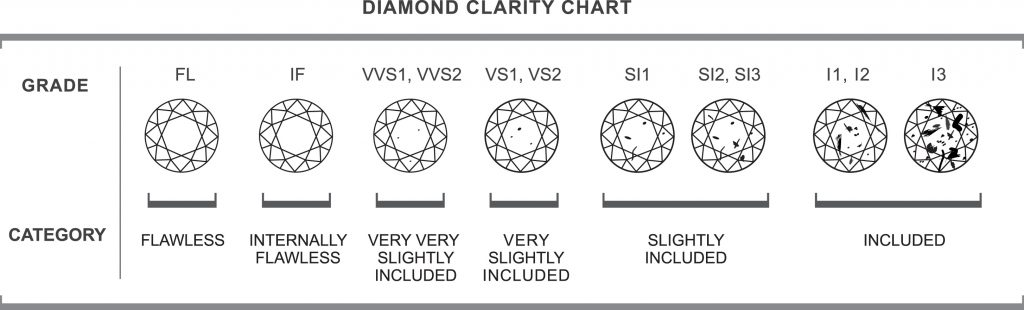

I tipi di chiarezza coincidono con quelli presenti nel dataset.

In [79]:
diamonds["clarity"].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

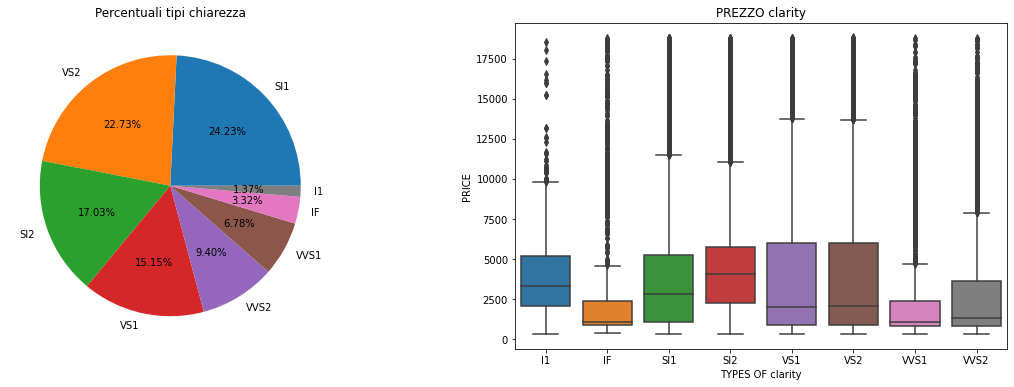

In [80]:
plt.figure(figsize=(30, 6))

diamonds["clarity"].value_counts().plot.pie(ax=plt.subplot(1,3,1), autopct='%.2f%%', title="Percentuali tipi chiarezza", ylabel="");

ax = sns.boxplot(x="clarity" , y="price", data=diamonds, ax=plt.subplot(1,3,2));
ax.set(xlabel="TYPES OF clarity", ylabel="PRICE");
ax.set_title("PREZZO clarity");

Sopra sono mostrati due grafici, uno a torta e un boxplot, molto esplicativi sui valori di chiarezza assunti dai diamanti presenti nel dataset.

**Carati** <br>
I carati indicano il peso di un diamante: un carato vale quanto 0.20 grammi.

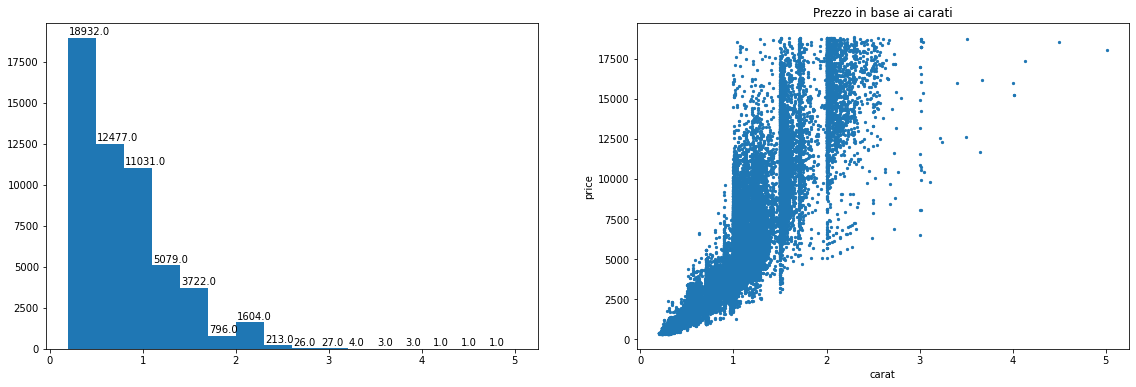

In [81]:
plt.figure(figsize=(30, 6))

counts, bins, ax = plt.subplot(1,3,1).hist(diamonds['carat'], bins=16)
for n, b in zip(counts, bins):
        plt.gca().text(b + 0.01, n + 200, str(n))

diamonds.plot.scatter("carat", "price", s=5, ax=plt.subplot(1,3,2), title="Prezzo in base ai carati");

Possiamo notare come il valore dei carati del diamante infuisce sul prezzo, ma non in maniera molto incisiva: infatti, la maggior parte dei diamanti presenti nel dataset ha un valore di carati compreso tra 0.2 e 2, e il loro prezzo in molte istanze è uguale o superiore a diamanti con carati maggiori. Ciò può essere dovuto al fatto che il prezzo è valutato non solo in base al peso dei carati, ma anche al peso delle altre variabili in questione, come il colore e la chiarezza.

Mostriamo di seguito una tabella che indica le dimensioni approssimative di un diamante in base alla sua caratura.
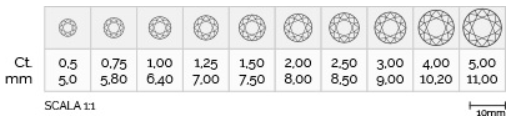

Ciò è in linea con i record presenti nel dataset. 
Possiamo dire che i dati a disposizione quindi sono veritieri e affidabili, come dimostrato nei seguenti grafici.

**X,Y,Z** <br>
Sono le dimensioni in mm dei diamanti.

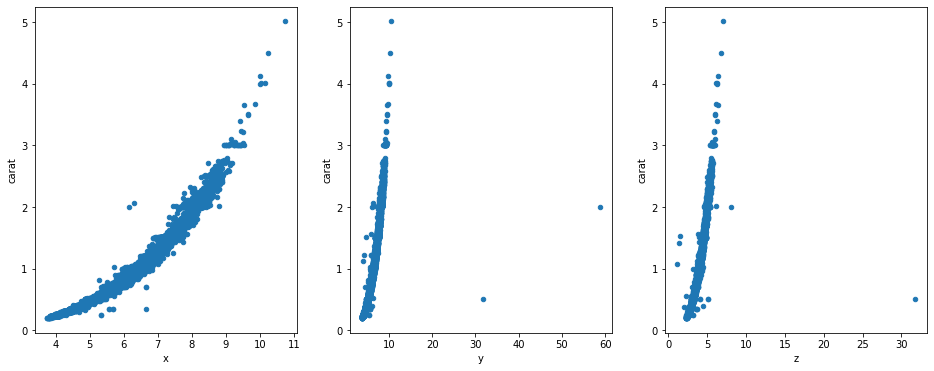

In [82]:
plt.figure(figsize=(16, 6))
diamonds.plot.scatter("x", "carat", ax=plt.subplot(1,3,1));
diamonds.plot.scatter("y", "carat", ax=plt.subplot(1,3,2));
diamonds.plot.scatter("z", "carat", ax=plt.subplot(1,3,3));

Di seguito possiamo vedere i grafici delle dimensioni in correlazione al prezzo dei diamanti.

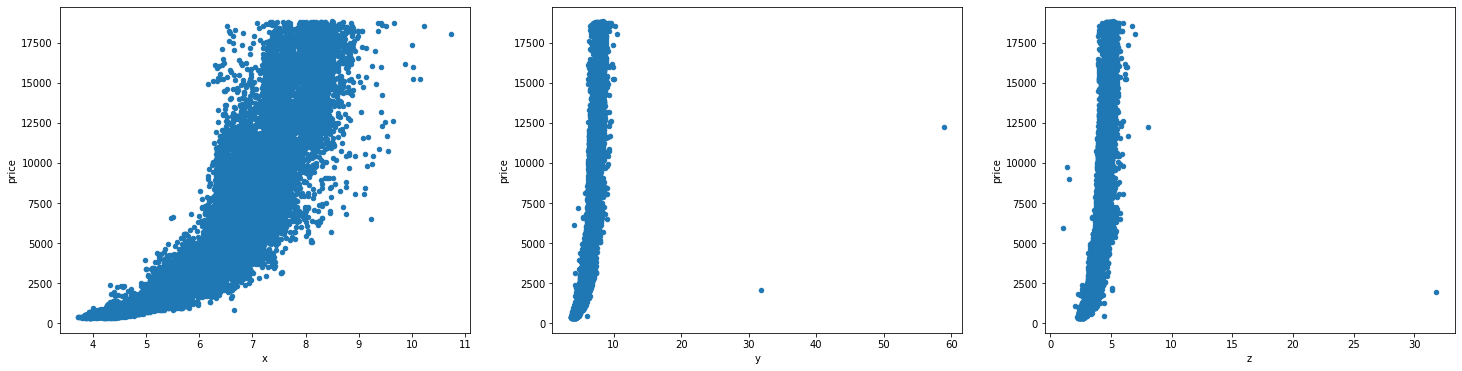

In [83]:
plt.figure(figsize=(25, 6))
diamonds.plot.scatter("x", "price", ax=plt.subplot(1,3,1));
diamonds.plot.scatter("y", "price", ax=plt.subplot(1,3,2));
diamonds.plot.scatter("z", "price", ax=plt.subplot(1,3,3));

Possiamo notare dei valori outliers che andrebbero poi a disturbare la precisione dei modelli, decidiamo quindi di eliminarli.

In [84]:
diamonds.drop(diamonds[(diamonds['y']>=30) | (diamonds['z']>=30)].index, inplace=True)

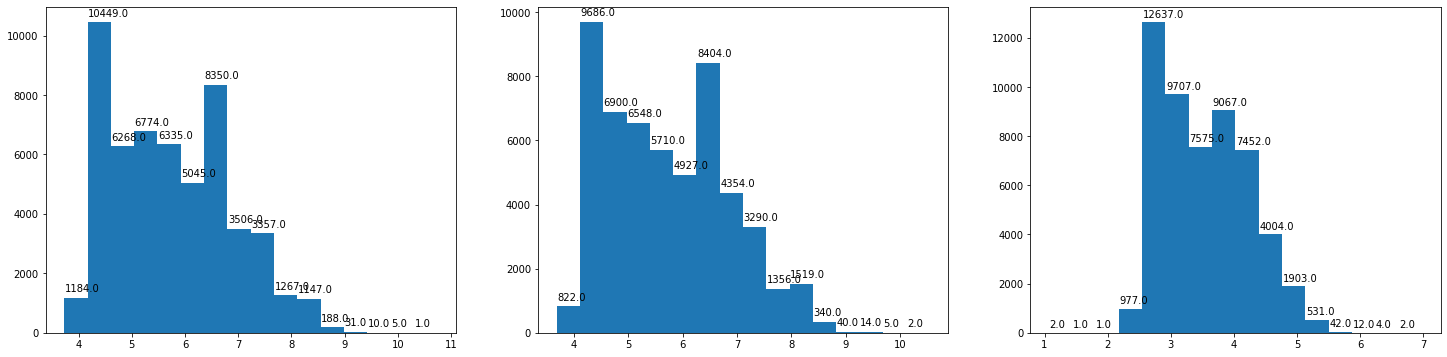

In [85]:
plt.figure(figsize=(25, 6))

counts, bins, _ = plt.subplot(1,3,1).hist(diamonds['x'], bins=16)
for n, b in zip(counts, bins):
        plt.gca().text(b + 0.01, n + 200, str(n))

counts, bins, _ = plt.subplot(1,3,2).hist(diamonds['y'], bins=16)
for n, b in zip(counts, bins):
        plt.gca().text(b + 0.01, n + 200, str(n))

counts, bins, _ = plt.subplot(1,3,3).hist(diamonds['z'], bins=16)
for n, b in zip(counts, bins):
        plt.gca().text(b + 0.01, n + 200, str(n))


**Table e Depth**<br>
Per quanto riguarda invece le relazioni tra il prezzo e le altre feature, analizziamo ora alcuni grafici di dispersione. Possiamo notare che non esiste una vera e propria relazione lineare tra prezzo e in questo caso profondità e table.

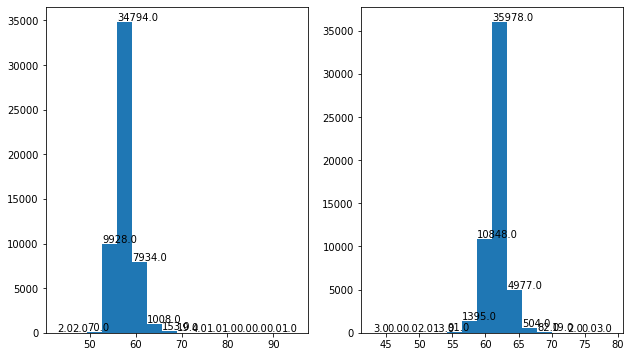

In [86]:
plt.figure(figsize=(16, 6))

counts, bins, _ = plt.subplot(1,3,1).hist(diamonds['table'], bins=16);
for n, b in zip(counts, bins):
        plt.gca().text(b + 0.01, n + 200, str(n))

counts, bins, _ = plt.subplot(1,3,2).hist(diamonds['depth'], bins=16);
for n, b in zip(counts, bins):
        plt.gca().text(b + 0.01, n + 200, str(n))

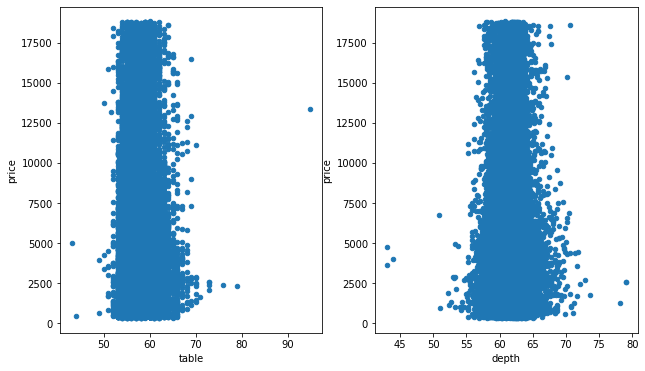

In [87]:
plt.figure(figsize=(16, 6))

diamonds.plot.scatter("table", "price", ax=plt.subplot(1,3,1));
diamonds.plot.scatter("depth", "price", ax=plt.subplot(1,3,2));

Come ci aspettavamo dopo aver controllato la correlazione di Pearson, **table** e **depth** non hanno una correlazione significativa al prezzo, perciò si potrebbero addirittura eliminare.

###Da categoriche a binarie
Trasformiamo ora le variabile categoriche in variabili binarie.
Utilizzando OneHotEncoder per ogni feature categorica ne vengono create tante quante i possibili valori della corrispondente variabile, inserendo 1 nella nuova feature corretta e 0 altrimenti.

In [88]:
diamond_data_encoded =  pd.get_dummies(diamonds)
diamond_data_encoded.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


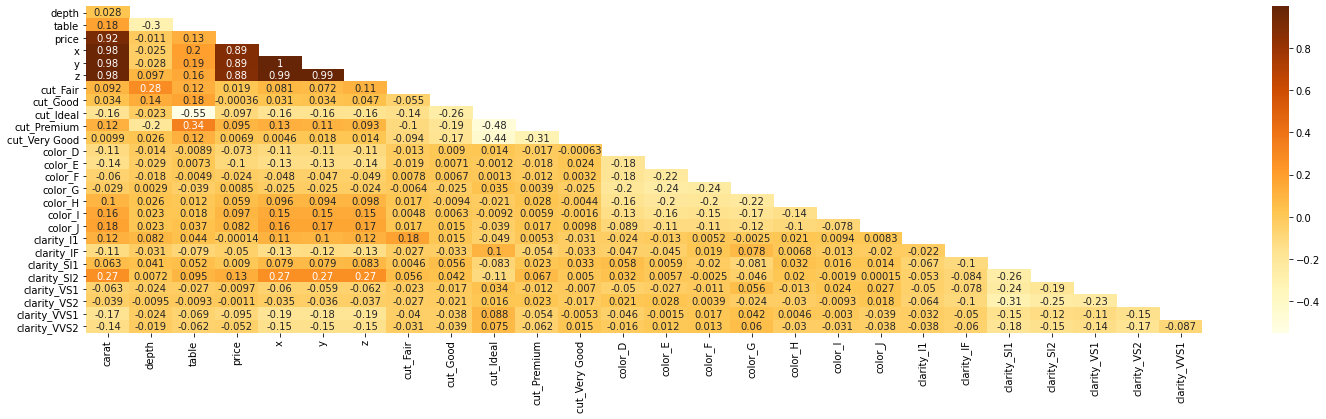

In [89]:
diamonds_Pearson = diamond_data_encoded.corr(method="pearson")
mask = np.triu(diamonds_Pearson)
mask = mask[1:, :-1]
corr = diamonds_Pearson.iloc[1:,:-1].copy() 

plt.figure(figsize=(25,6))
sns.heatmap(corr, annot=True, mask=mask, cmap='YlOrBr');
#Scegliere colore  

## Regressione <br>
Partiamo ora ad analizzare alcuni modelli di previsione del prezzo dei diamanti, in base alle loro caratteristiche intrinseche. Iniziamo con la preparazione dei dati da utilizzare nei modelli per la fase di training e la successiva fase di validazione.


###Multicollinearità

**Preparazione dei dati** <br>
La fase di preparazione dei dati è fondamentale per ottenere dei risultati accurati e affidabili dai modelli di regressione.
Una cosa fondamentale è la conversione dei valori categorici in numerici/binari, come detto in precedenza. Utilizzeremo ora la OneHotEncoder, in quanto è possibile sfruttarla all'interno di pipeline per creare filtri in automatico.

**Problema multicollinearità** <br>
Un problema può essere rappresentato dalla eccessiva collinearità, quindi dipendenza, tra le variabili di input. Come si può vedere dal grafico di correlazione mostrato precedentemente, possiamo notare come le variabili dimensionali (x,y,z) siano molto correlate al valore dei carati. Questo potrebbe dar problemi in fase di regressione. Un'idea è quella di sostituire le variabili dimensionali con una variabile derivata da esse come il volume. Un'altra possibile soluzione è invece rappresentata dalla regolarizzazione.

In [90]:
diamonds['ideal_volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.drop(['x','y','z'], axis=1, inplace= True)

Separiamo in due array i nomi delle colonne numeriche da quelle categoriche.

In [91]:
categorical_vars = ["cut", "color", "clarity"]
numeric_vars = ["carat", "table", "ideal_volume", "depth"]

Nella cella successiva definiamo una funzione che ha l'obiettivo di calcolare il Variance Inflation Factor, ovvero un indice che misura la gravità della multicollinearità all'interno del nostro dataset.

In [92]:
numericDiamonds = diamonds.drop(categorical_vars, axis=1)
numericDiamonds.drop("price", axis=1, inplace = True)

def vif_calculator(dataframe):
  vif_data = pd.DataFrame()
  vif_data["feature"] = dataframe.columns
  
  vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                            for i in range(len(dataframe.columns))]
  return vif_data

In genere un valore VIF superiore a 4 indica che potrebbe esistere multicollinearità.

In [93]:
vif_calculator(numericDiamonds)

,feature,VIF
0,carat,1804.329404
1,depth,389.579589
2,table,397.244371
3,ideal_volume,1824.896910


Possiamo notare come i valori VIF siano ben superiori al valore limite di 4. Procediamo quindi a rimuovere due colonne: ideal_volume precedentemente aggiunta e table.

In [94]:
vif_calculator(numericDiamonds.drop(["ideal_volume", "table"], axis=1))

,feature,VIF
0,carat,3.837463
1,depth,3.837463


Rimuovendo le sopracitate colonne i valori VIF delle uniche due variabili numeriche rimaste sono decisamente più bassi e accettabili. Procediamo quindi a formalizzare la rimozione delle due colonne e aggiornare l'array dei nomi delle variabili numeriche.

In [95]:
diamondsReg = diamonds.drop(["ideal_volume", "table"], axis=1)
numeric_vars = ["carat", "depth"]

###Funzioni d'errore

Procediamo ora a definire le funzioni per analizzare gli errori dei modelli che andremo a costruire.

In [96]:
# definisco funzione per errore relativo
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# funzione per calcolare e stampare tutte e tre
def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

###Preparazione dei dati e delle fold

Prepariamo ora i dati da utilizzare per la fase di training e per la validazione dei modelli di regressione che costruiremo. Abbiamo deciso di usare una dimensione di 1/3 del dataset per il validation set.

In [97]:
X = diamondsReg.drop(columns="price")
y = diamondsReg["price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

Nella seguente cella mostriamo tutte le feature che andremo ad utilizzare nella regressione, ovvero le feature numeriche unite a quelle categoriche.

In [98]:
diamondsColumns = pd.get_dummies(X).columns
diamondsColumns

Index(['carat', 'depth', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

Creiamo ora le fold da utilizzare nella Nested Cross Fold Validation.

In [99]:
inner_cv = KFold(3, shuffle=True, random_state=42)
outer_cv = KFold(5, shuffle=True, random_state=42)

La funzione seguente calcola la Nested Cross Fold Validation, prendendo in input il modello, la Grid e le fold interna ed esterna.

In [100]:
def nested_cv(model, grid, cv_outer, cv_inner):
    results = []
    for train_indices, val_indices in cv_outer.split(X, y):
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
        gs = GridSearchCV(model, grid, cv=cv_inner, n_jobs=-1)
        gs.fit(X_train, y_train)
        score = gs.score(X_val, y_val)
        results.append(score)
    return results

In alcune GridSearch sono stati volontariamente omessi alcuni valori di iperparametri, testati precedentemente su altri notebook. Questa decisione è stata presa per alleggerire i tempi di calcolo in questo notebook, in modo da presentare solo i risultati più rilevanti.

###Regressione Lineare<br>
Procediamo ora a sviluppare un modello di regressione lineare. La componente 'preproc' indica il preprocessore, ovvero una trasformazione da eseguire sulle feature prima di ogni regressione. Sostanzialmente tutte le feature passano per il preprocessore e vengono filtrate: le feature presenti nell'array numeric_vars saranno standardizzate con lo StandardScaler, le feature presenti in categorical_vars verranno elaborate dall'OneHotEncoder mentre le feature restanti verranno scartate.

In [ ]:
modelLinear = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars)
])),
    ("lin" , LinearRegression())
])

modelLinear.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['carat', 'depth']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown

Stampiamo ora le statistiche ottenute dal modello lineare. Come ci previsto notiamo un errore relativo poco superiore al 40% e un coefficiente R-squared pari a 0.91.

In [ ]:
print_eval(X_val, y_val, modelLinear)

   Mean squared error: 1.2591e+06
       Relative error: 44.06128%
R-squared coefficient: 0.9191


Valutiamo ora i valori dei coefficienti theta calcolati dalla regressione.

In [ ]:
pd.Series(modelLinear.named_steps["lin"].coef_, diamondsColumns)

carat            4225.462686
depth             -11.095356
cut_Fair         -674.379419
cut_Good          -17.394799
cut_Ideal         318.882151
cut_Premium       193.357010
cut_Very Good     179.535056
color_D           829.374707
color_E           602.064403
color_F           521.073514
color_G           305.878495
color_H          -149.687618
color_I          -610.619256
color_J         -1498.084247
clarity_I1      -3825.222346
clarity_IF       1651.382995
clarity_SI1      -233.193540
clarity_SI2     -1173.447261
clarity_VS1       728.902841
clarity_VS2       421.902833
clarity_VVS1     1260.314548
clarity_VVS2     1169.359930
dtype: float64

Come ci aspettavamo la feature dei carati influenza fortemente il valore finale del prezzo. 
Per quanto riguarda le variabili categoriche(chiarezza, taglio e colore) notiamo che una qualità superiore è associata ad un theta maggiore, mentre le qualità inferiori hanno theta molto negativi. 
Ad esempio se consideriamo la chiarezza, I1(minore qualità) ha un theta di -3825 e VVS2(maggiore qualità) mostra un theta di 1169.



###Regressione Lasso<br>
Utilizziamo la regressione Lasso (regolarizzazione L1) con un valore di alpha molto alto per individuare le feature più significative per il modello

In [ ]:
modelLasso = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars)
])),
    ("lin" , Lasso(alpha = 50, random_state=42))
])

modelLasso.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['carat', 'depth']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown

In [ ]:
print_eval(X_val, y_val, modelLasso)

   Mean squared error: 1.778e+06
       Relative error: 33.88780%
R-squared coefficient: 0.88576


In [ ]:
pd.Series(modelLasso.named_steps["lin"].coef_, diamondsColumns)

carat            3822.289427
depth             -73.451802
cut_Fair           -0.000000
cut_Good           -0.000000
cut_Ideal         114.237054
cut_Premium        -0.000000
cut_Very Good       0.000000
color_D             0.000000
color_E             0.000000
color_F             0.000000
color_G             0.000000
color_H           -38.856837
color_I          -228.873828
color_J          -612.611959
clarity_I1       -565.425541
clarity_IF          0.000000
clarity_SI1      -419.398563
clarity_SI2     -1089.044736
clarity_VS1         0.000000
clarity_VS2        -0.000000
clarity_VVS1        0.000000
clarity_VVS2      125.832253
dtype: float64

Come osservato nella correlazione di Pearson notiamo come i carati siano significativi per il prezzo finale del diamante.
Nella variabili categoriche solo gli estremi vengono tenuti in considerazione.

###Regressione polinomiale<br>
Analizziamo ora la regressione polinomiale, è molto simile alla regressione lineare ma utilizzando una funzione di grado superiore a 1, riesce a descrivere meglio la distribuzione e l'andamento dei dati.<br>
Nella cella successiva è implementato un modello polinomiale con relativa GridSearch.

In [ ]:
modelLinearPoly = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler() , numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("poly",  PolynomialFeatures(include_bias=False)),
    ("lin" , LinearRegression())
])

gridLinearPoly = {
    "poly__degree": [2,3,4]
}

gsLinearPoly = GridSearchCV(modelLinearPoly, gridLinearPoly, cv=inner_cv)
gsLinearPoly.fit(X_train, y_train)
pd.DataFrame(gsLinearPoly.cv_results_).sort_values("mean_test_score", ascending=False)

In [ ]:
print_eval(X_val, y_val, gsLinearPoly.best_estimator_)

###Regressione Ridge<br>
Creiamo una pipeline per effettuare una regressione polinomiale con regolarizzazione L2 (Ridge).

In [ ]:
modelRidge = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", "passthrough" , numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("poly",  PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),
    ("regr",  Ridge(random_state=42))
])

gridRidge = {
    "poly__degree": [2, 3, 4],      # <- grado polinomio
    "regr__alpha":  [0.1, 1, 10] # <- regolarizzazione
}

In [ ]:
gs = GridSearchCV(modelRidge, gridRidge, cv=inner_cv, n_jobs=-1)
gs.fit(X_train, y_train);
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

Eseguiamo ora una Nested Cross Fold Validation e il relativo score medio.

In [ ]:
res = nested_cv(modelRidge, gridRidge, outer_cv, inner_cv)

In [ ]:
np.mean(res)

Nella cella seguente sono mostrati i parametri migliori trovati dalla GridSearch, il numero di coefficienti e lo score migliore.

In [ ]:
gs.best_params_

In [ ]:
len(gs.best_estimator_.named_steps["regr"].coef_)

In [ ]:
gs.best_score_

###Elastic Net

La Elastic Net è un modello che unisce le peculiarità della regolarizzazione L1 (usata nella Lasso) con quella L2 (usata nella Ridge).

In [ ]:
modelElastic = Pipeline([
                         ("preproc", ColumnTransformer([
                      ("numeric", StandardScaler() , numeric_vars),
                      ("categorical", OneHotEncoder(), categorical_vars)
                  ])),
                  ("poly", PolynomialFeatures(include_bias=False)),
                  ("regr", ElasticNet(max_iter=5000, random_state=42))
])
gridElastic = {
    "poly__degree": [2, 3],
    "regr__alpha": [1, 10],
    "regr__l1_ratio": [0.1, 0.25, 1]
}

gsElastic = GridSearchCV(modelElastic, gridElastic, cv=inner_cv)
gsElastic.fit(X_train, y_train);
pd.DataFrame(gsElastic.cv_results_).sort_values("mean_test_score", ascending=False)

In [ ]:
print_eval(X_val, y_val, gsElastic.best_estimator_)

### Kernel Ridge (nystroem) <br>
Il modello successivo utilizza una Ridge insieme al metodo Nystroem, alternativa alla KernelRidge.<br>
Per prima cosa analizziamo il modello con kernel RBF.

In [ ]:
modelKernel_rbf = Pipeline([
                  ("preproc", ColumnTransformer([
                      ("numeric", "passthrough" , numeric_vars),
                      ("categorical", OneHotEncoder(), categorical_vars)
                  ])),
                  ("kernel", Nystroem('rbf', gamma=0.5,random_state = 42)),
                  ("scaler", StandardScaler()),
                  ("reg", Ridge(random_state = 42))
])

gridKerner_rbf = {
    "reg__alpha":  [0.1,1, 10],
    "kernel__gamma":[0.1, 0.5, 1, 10]
}

gsKernel_rbf = GridSearchCV(modelKernel_rbf, gridKerner_rbf, cv=inner_cv, n_jobs=-1)

In [ ]:
gsKernel_rbf.fit(X_train, y_train);
pd.DataFrame(gsKernel_rbf.cv_results_).sort_values("mean_test_score", ascending=False)

In [ ]:
gsKernel_rbf.best_params_

In [ ]:
print_eval(X_val, y_val, modelKernel_rbf)

Successivamente testiamo il kernel polinomiale.

In [ ]:
modelKernel_poly = Pipeline([
                  ("preproc", ColumnTransformer([
                      ("numeric", "passthrough" , numeric_vars),
                      ("categorical", OneHotEncoder(), categorical_vars)
                  ])),
                  ("kernel", Nystroem('polynomial', n_components=2000,random_state = 42)),
                  ("scaler", StandardScaler()),
                  ("reg", Ridge(random_state = 42))
])

gridKerner_poly = {
    "kernel__degree" : [3,4,5],
    "kernel__gamma":[0.1, 0.5, 1, 10],
    "reg__alpha":  [0.1, 1, 10]
}

gsKernel_poly = GridSearchCV(modelKernel_poly, gridKerner_poly, cv=inner_cv, n_jobs=-1)

In [ ]:
gsKernel_poly.fit(X_train, y_train);
pd.DataFrame(gsKernel_poly.cv_results_).sort_values("mean_test_score", ascending=False)

###Alberi decisionali<br>
Analizziamo ora un modello di regressione ad alberi decisionali.

In [101]:
modelDecisionTree = Pipeline([
                  ("preproc", ColumnTransformer([
                      ("numeric", StandardScaler(), numeric_vars),
                      ("categorical", OneHotEncoder(), categorical_vars)
                  ])),
                  ("decisiontree", DecisionTreeRegressor(random_state=42))
])
gridDecisionTree = {
    "decisiontree__max_depth": [3, 5, 10, None],
    "decisiontree__min_samples_split": [2, 0.02, 0.05, 0.1]
}
gsDecisionTree = GridSearchCV(modelDecisionTree, gridDecisionTree, cv=inner_cv)

In [102]:
gsDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['carat',
                       

In [103]:
pd.DataFrame(gsDecisionTree.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontree__max_depth,param_decisiontree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.223457,0.005175,0.018891,0.003113,10,2,"{'decisiontree__max_depth': 10, 'decisiontree_...",0.964669,0.964007,0.963132,0.963936,0.000630,1
12,0.920218,0.012369,0.019416,0.000195,None,2,"{'decisiontree__max_depth': None, 'decisiontre...",0.963049,0.964289,0.964147,0.963829,0.000554,2
13,0.129169,0.001712,0.016565,0.000222,None,0.02,"{'decisiontree__max_depth': None, 'decisiontre...",0.951637,0.949533,0.948198,0.949790,0.001416,3
9,0.121196,0.002410,0.017285,0.000575,10,0.02,"{'decisiontree__max_depth': 10, 'decisiontree_...",0.951300,0.949251,0.947694,0.949415,0.001477,4
14,0.088897,0.002165,0.016172,0.000116,None,0.05,"{'decisiontree__max_depth': None, 'decisiontre...",0.929639,0.926097,0.924615,0.926784,0.002108,5
10,0.085952,0.003562,0.016484,0.000457,10,0.05,"{'decisiontree__max_depth': 10, 'decisiontree_...",0.929591,0.926056,0.924580,0.926742,0.002102,6
4,0.075017,0.002163,0.016118,0.000302,5,2,"{'decisiontree__max_depth': 5, 'decisiontree__...",0.913523,0.907272,0.909881,0.910225,0.002563,7
5,0.073324,0.001315,0.018073,0.001448,5,0.02,"{'decisiontree__max_depth': 5, 'decisiontree__...",0.912691,0.905855,0.908097,0.908881,0.002845,8
6,0.076170,0.004001,0.016356,0.000405,5,0.05,"{'decisiontree__max_depth': 5, 'decisiontree__...",0.906006,0.899556,0.900549,0.902037,0.002836,9
15,0.071334,0.001265,0.016130,0.000170,None,0.1,"{'decisiontree__max_depth': None, 'decisiontre...",0.898304,0.895112,0.891408,0.894942,0.002818,10


In [104]:
print_eval(X_val, y_val, gsDecisionTree.best_estimator_)

   Mean squared error: 5.1258e+05
       Relative error: 11.18716%
R-squared coefficient: 0.96707


Nella cella seguente possiamo vedere i parametri migliori trovati dalla GridSearch.

In [105]:
gsDecisionTree.best_params_

{'decisiontree__max_depth': 10, 'decisiontree__min_samples_split': 2}

Di seguito è mostrato l'albero decisionale per una più chiara visione dei vari nodi creati e visitati.

In [110]:
print(export_text(gsDecisionTree.best_estimator_.named_steps["decisiontree"], feature_names=list(diamondsColumns), max_depth=2))

|--- carat <= 0.41
|   |--- carat <= -0.37
|   |   |--- carat <= -0.72
|   |   |   |--- truncated branch of depth 8
|   |   |--- carat >  -0.72
|   |   |   |--- truncated branch of depth 8
|   |--- carat >  -0.37
|   |   |--- carat <= 0.14
|   |   |   |--- truncated branch of depth 8
|   |   |--- carat >  0.14
|   |   |   |--- truncated branch of depth 8
|--- carat >  0.41
|   |--- carat <= 1.46
|   |   |--- clarity_SI2 <= 0.50
|   |   |   |--- truncated branch of depth 8
|   |   |--- clarity_SI2 >  0.50
|   |   |   |--- truncated branch of depth 8
|   |--- carat >  1.46
|   |   |--- carat <= 2.45
|   |   |   |--- truncated branch of depth 8
|   |   |--- carat >  2.45
|   |   |   |--- truncated branch of depth 8



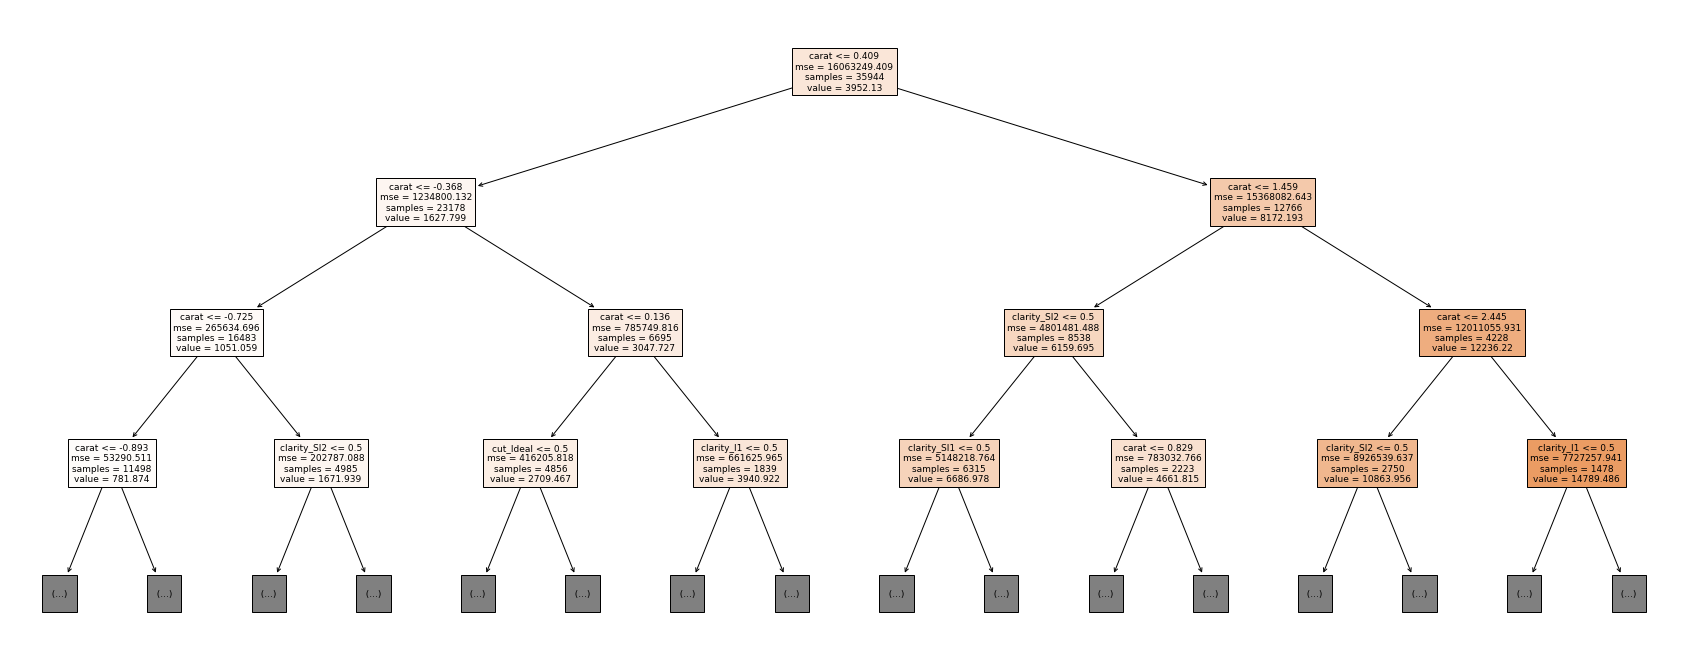

In [107]:
plt.figure(figsize=(30,12))
plot_tree(gsDecisionTree.best_estimator_.named_steps["decisiontree"], feature_names=list(diamondsColumns), filled=True, max_depth=3);

In [108]:
gsDecisionTree.best_estimator_.named_steps["decisiontree"].get_depth()

10

In [109]:
gsDecisionTree.best_estimator_.named_steps["decisiontree"].get_n_leaves()

852

###Risultati finali<br>
Analizziamo e confrontiamo ora i risultati e gli errori dei modelli sopra costruiti.

In [ ]:
x = PrettyTable()

x.field_names = ["Errore", "Lineare", "Lasso", "Polinomiale", "Ridge",'Elastic Net', 'Nystroem RBF', 'Nystroem Poly', 'Decision Tree']

x.add_row(['Medio quadratico','1.2591e+06','1.778e+06','3.7933e+05','3.5942e+05','3.9426e+05','1.1206e+06','5.2705e+05','5.1258e+05' ])
x.add_row(["Relativo (%)", 44.06128,33.88780,12.47583,10.19334,12.50396,36.24360,19.25912, 11.18716])
x.add_row(["R^2", 0.9191,0.88576,0.97563,0.9761,0.97467,0.928,0.96719, 0.96707])
x.add_row(["Standard deviation score", '-', '-',0.00084,0.001638,0.001496,0.006524,0.001640, 0.000630])

print(x)

La Lasso presenta uno score relativamente basso rispetto alle controparti; tuttavia è stata volutamente utilizzata per il solo scopo di visualizzare correttamente le feature meno rilevanti e quindi annullabili. <br>
Il modello più performante è la regressione Ridge con uno score pari a 0.9761. 

##Classificazione
L'obiettivo è classificare il taglio (cut) dei diamanti date le loro caratteristiche, realizzando e comparando diversi modelli di classificazione dei diamanti tenendo conto di tutte le feature contenute nel dataset.

###Preparazione dati<br>
Procediamo ora con la preparazione dei dati per la classificazione.

In [111]:
categorical_vars = ["clarity", "color"]
numeric_vars = ["carat", "depth", "price", "table"]
diamonds_class = diamonds.drop("ideal_volume", axis=1)

In [112]:
X = diamonds_class.drop(columns="cut")
y = diamonds_class["cut"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [113]:
diamonds_colums = pd.get_dummies(X).columns
diamonds_colums

Index(['carat', 'depth', 'table', 'price', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [114]:
skf = StratifiedKFold(3, shuffle=True, random_state=42)

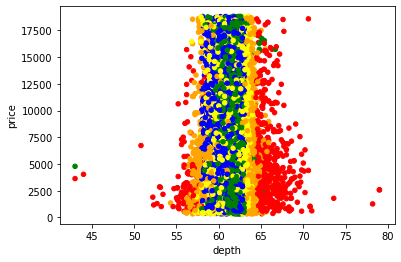

In [115]:
iris_color_map = {"Premium": "blue", "Ideal": "green", "Fair": "red", "Very Good" : "yellow", "Good":"orange"}
X_train.plot.scatter(X_train.columns[3], X_train.columns[5],
                       c=y_train.map(iris_color_map));

Come possiamo notare dal grafico (mettendo in relazione depth e price) non ci aspettiamo elevata precisione dai modelli, non essendo la separazione tra i tagli ben delineata. E' possibile tuttavia poter riconoscere delle aree abbastanza distinte mettendo in relazione la table e la profondità del diamante.

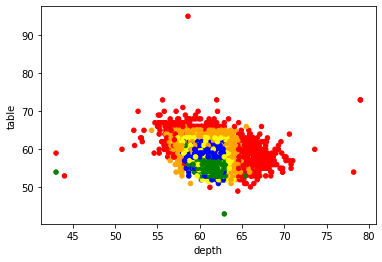

In [116]:
X_train.plot.scatter(X_train.columns[3], X_train.columns[4],
                       c=y_train.map(iris_color_map));

###Perceptron<br>
Il primo modello di classificazione che anallizzeremo è il Perceptron, alla base delle reti neurali.

In [ ]:
modelPtron = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("ptron" , Perceptron(random_state=42, n_jobs=-1))
])

gridPtron = {
    "ptron__penalty": ["l2", "l1", "elasticnet"],
    "ptron__alpha": np.logspace(-3, 3, 7)
}

gsPtron = GridSearchCV(modelPtron, gridPtron, cv=skf, n_jobs=-1)

In [ ]:
gsPtron.fit(X_train, y_train)

In [ ]:
gsPtron.score(X_val, y_val)

Come ipotizzato lo score finale non risulta molto elevato.

In [ ]:
gsPtron.best_params_

Ora analizziamo a fondo il modello migliore trovato dalla GridSearch.

In [117]:
modelPtron = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("ptron" , Perceptron(penalty="l1", alpha=0.1, random_state=42, n_jobs=-1))
])

modelPtron.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['carat', 'depth', 'price',
                                                   'table']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
         

La seguente tabella mostra i coefficienti calcolati per ogni coppia (feature, classe).

In [118]:
pd.DataFrame(modelPtron.named_steps["ptron"].coef_, index=modelPtron.classes_, columns=diamonds_colums)

,carat,depth,table,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
Fair,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Good,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ideal,0.0,0.0,0.0,-0.131133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Premium,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Very Good,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
gsPtron.score(X_val, y_val)

###Logistic Regression

Utilizziamo ora la logistic regression, un modello di regressione non lineare a cui testiamo regolarizzazione l1 ed l2 tramite un gridsearch

In [ ]:
modelLog = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler() , numeric_vars),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("logreg", LogisticRegression(solver="saga", multi_class="multinomial", random_state=42, max_iter=1000))
])

gridLog = {
    "poly__degree": [2],
    "logreg__penalty": ["l2", "l1"],
    "logreg__C": [0.1, 1, 10]
}

gsLog = GridSearchCV(modelLog, gridLog, cv=skf)

In [ ]:
gsLog.fit(X_train, y_train)

In [ ]:
gsLog.best_score_

In [ ]:
pd.DataFrame(gsLog.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

In [119]:
modelLog = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler() , numeric_vars),
        ("categorical", OneHotEncoder() , categorical_vars)
])),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("logreg", LogisticRegression(solver="saga", multi_class="multinomial", C=10, penalty="l2", random_state=42))
])

modelLog.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['carat', 'depth', 'price',
                                                   'table']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
         

###Multi-Layer Perceptron
Analizziamo ora un modello di classificazione Multi-Layer Perceptron (utilizzando regolarizzazione l2 e discesa del gradiente stocastica)

In [120]:
modelPtronMulti = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("ptron" , MLPClassifier(hidden_layer_sizes=4, activation="identity"))
])

In [121]:
modelPtronMulti.fit(X_train, y_train);

In [ ]:
modelPtronMulti.score(X_val, y_val)

###SVM
Il modello utilizza SVM.<br>
Testiamo il modello con un kernel poly.

In [ ]:
modelSVM_poly = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("svm" , svm.SVC("poly",random_state=42))
])

gridSVM_poly = {
    "svm__C" : [0.1, 1, 10],
    "svm__degree" : [3,4]
}

gsSVM_poly = GridSearchCV(modelSVM_poly, gridSVM_poly, cv=skf, n_jobs=-1)

In [ ]:
gsSVM_poly.fit(X_train, y_train)

In [ ]:
pd.DataFrame(gsSVM.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

In [122]:
modelSVM_poly = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("svm" , svm.SVC(C=10, kernel="poly", degree= 3, random_state=42))
])

modelSVM_poly.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['carat', 'depth', 'price',
                                                   'table']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
         

Proviamo ora SVM utilizzando un kernel rbf

In [125]:
modelSVM_rbf = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("svm" , svm.SVC("rbf", random_state=42))
])

gridSVM_rbf = {
    "svm__C": [0.1, 1, 10]
}

gsSVM_rbf = GridSearchCV(modelSVM_rbf, gridSVM_rbf, cv=skf, n_jobs=-1)

In [126]:
gsSVM_rbf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['carat',
             

In [127]:
pd.DataFrame(gsSVM_rbf.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,42.804830,6.071569,12.357282,2.359850,10,{'svm__C': 10},0.711734,0.710792,0.712962,0.711830,0.000888,1
1,39.181315,0.593071,14.746372,0.197941,1,{'svm__C': 1},0.712652,0.708872,0.713129,0.711551,0.001904,2
0,45.398090,0.139454,16.636710,0.378074,0.1,{'svm__C': 0.1},0.701552,0.697354,0.701360,0.700089,0.001935,3


###KNeighborsClassifier
Creiamo un modello KNeighborsClassifier

In [128]:
modelKNC = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("knc", KNeighborsClassifier(n_jobs=-1))
])

gridKNC = {
            'knc__n_neighbors': range(1, 10, 1),
            'knc__weights': ['uniform', 'distance']
}

gsKNC = GridSearchCV(modelKNC, gridKNC, cv=skf, n_jobs=-1)

In [129]:
gsKNC.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['carat',
             

In [130]:
pd.DataFrame(gsKNC.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knc__n_neighbors,param_knc__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
16,0.199378,0.002864,3.541021,0.035161,9,uniform,"{'knc__n_neighbors': 9, 'knc__weights': 'unifo...",0.668419,0.667056,0.659377,0.664951,0.003980,1
14,0.251964,0.067433,3.018513,0.114895,8,uniform,"{'knc__n_neighbors': 8, 'knc__weights': 'unifo...",0.664413,0.664719,0.659294,0.662809,0.002489,2
12,0.232809,0.028320,2.895999,0.039321,7,uniform,"{'knc__n_neighbors': 7, 'knc__weights': 'unifo...",0.662076,0.660129,0.657207,0.659804,0.002001,3
10,0.199806,0.012232,2.844667,0.077237,6,uniform,"{'knc__n_neighbors': 6, 'knc__weights': 'unifo...",0.659489,0.665303,0.653702,0.659498,0.004736,4


###Random Forest
Usiamo l'algoritmo RandomForest che combina più alberi semplici per trovare la miglior soluzione

In [131]:
modelForest = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("forest", RandomForestClassifier(n_jobs=-1, random_state=42))
])

gridForest = {
    'forest__n_estimators': range(5, 10),
    'forest__min_samples_split': range(2, 5),
    'forest__max_depth': [None] + [i for i in range(1, 3)]
}
gsForest = GridSearchCV(modelForest, gridForest, cv=skf, n_jobs=-1)


In [132]:
gsForest.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['carat',
             

In [133]:
pd.DataFrame(gsForest.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__max_depth,param_forest__min_samples_split,param_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,0.426470,0.045888,0.151449,0.015090,None,4,9,"{'forest__max_depth': None, 'forest__min_sampl...",0.704640,0.700359,0.708121,0.704373,0.003175,1
13,0.400361,0.044364,0.187069,0.003517,None,4,8,"{'forest__max_depth': None, 'forest__min_sampl...",0.703305,0.695518,0.707620,0.702148,0.005008,2
9,0.443320,0.081392,0.162821,0.025041,None,3,9,"{'forest__max_depth': None, 'forest__min_sampl...",0.699716,0.697020,0.703113,0.699950,0.002493,3
8,0.418081,0.041451,0.176143,0.019326,None,3,8,"{'forest__max_depth': None, 'forest__min_sampl...",0.701302,0.693515,0.701110,0.698642,0.003627,4


###Decision tree
Qui utilizziamo il modello decision tree per vedere le differenze con il Random Forest 

In [134]:
%%time
modelDecisionTree = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric"    , StandardScaler(), numeric_vars    ),
        ("categorical", OneHotEncoder() , categorical_vars),
])),
    ("tree", DecisionTreeClassifier(random_state=42))
])

tree_grid = {
             'tree__min_samples_split': range(2, 4, 1),
             'tree__min_samples_leaf': range(1, 4, 1), 
             'tree__max_depth': [None] + [i for i in range(2, 7)]}

gsDecisionTree = GridSearchCV(modelDecisionTree, tree_grid, cv=skf, n_jobs=-1)

CPU times: user 182 µs, sys: 3 µs, total: 185 µs
Wall time: 189 µs


In [135]:
gsDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['carat',
             

In [136]:
pd.DataFrame(gsDecisionTree.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,param_tree__min_samples_leaf,param_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
31,0.165031,0.000923,0.039210,0.001499,6,1,3,"{'tree__max_depth': 6, 'tree__min_samples_leaf...",0.729094,0.728821,0.733662,0.730525,0.002221,1
30,0.167222,0.005490,0.044878,0.005660,6,1,2,"{'tree__max_depth': 6, 'tree__min_samples_leaf...",0.729094,0.728821,0.733662,0.730525,0.002221,1
33,0.168841,0.004223,0.047673,0.006009,6,2,3,"{'tree__max_depth': 6, 'tree__min_samples_leaf...",0.729010,0.728821,0.733328,0.730386,0.002081,3
32,0.165863,0.002558,0.038916,0.001172,6,2,2,"{'tree__max_depth': 6, 'tree__min_samples_leaf...",0.729010,0.728821,0.733328,0.730386,0.002081,3


###Affidabilità dei modelli classificazione

###Confusion matrix
Una confusion matrix è una tabella in cui ogni colonna rappresenta i valori predetti, mentre ogni riga rappresenta i valori reali.
Restituisce una rappresentazione dell'accuratezza.


Automatizziamo il calcolo della confusion matrix con questa funzione

In [137]:
def confusion_matrix_calculation(model):
    return confusion_matrix(y_val, model.predict(X_val))

In [138]:
cm_ptron = pd.DataFrame(confusion_matrix_calculation(modelPtron), modelPtron.classes_, modelPtron.classes_)
cm_ptron

,Fair,Good,Ideal,Premium,Very Good
Fair,0,0,215,340,0
Good,0,0,658,953,0
Ideal,0,0,6849,400,0
Premium,0,0,544,3959,0
Very Good,0,0,1704,2351,0


In [139]:
cm_log = pd.DataFrame(confusion_matrix_calculation(modelLog), modelLog.classes_, modelLog.classes_)
cm_log

,Fair,Good,Ideal,Premium,Very Good
Fair,360,75,61,44,15
Good,184,240,656,375,156
Ideal,4,0,6962,279,4
Premium,0,63,1470,2880,90
Very Good,23,162,2200,1419,251


In [140]:
cm_ptronMulti = pd.DataFrame(confusion_matrix_calculation(modelPtronMulti), modelPtronMulti.classes_, modelPtronMulti.classes_)
cm_ptronMulti

,Fair,Good,Ideal,Premium,Very Good
Fair,270,64,51,99,71
Good,40,237,420,487,427
Ideal,0,3,6608,356,282
Premium,5,36,720,3022,720
Very Good,7,93,1470,1569,916


In [141]:
cm_svm_rbf = pd.DataFrame(confusion_matrix_calculation(gsSVM_rbf.best_estimator_), gsSVM_rbf.best_estimator_.classes_, gsSVM_rbf.best_estimator_.classes_)
cm_svm_rbf

,Fair,Good,Ideal,Premium,Very Good
Fair,455,76,4,19,1
Good,60,922,32,197,400
Ideal,4,9,6669,375,192
Premium,0,42,504,3576,381
Very Good,7,260,1047,1496,1245


In [142]:
cm_svm_poly = pd.DataFrame(confusion_matrix_calculation(modelSVM_poly), modelSVM_poly.classes_, modelSVM_poly.classes_)
cm_svm_poly

,Fair,Good,Ideal,Premium,Very Good
Fair,440,90,2,18,5
Good,66,931,25,182,407
Ideal,5,11,6624,387,222
Premium,3,59,504,3521,416
Very Good,4,322,1038,1464,1227


In [143]:
cm_knc = pd.DataFrame(confusion_matrix_calculation(gsKNC.best_estimator_), gsKNC.best_estimator_.classes_, gsKNC.best_estimator_.classes_)
cm_knc

,Fair,Good,Ideal,Premium,Very Good
Fair,359,158,5,18,15
Good,34,779,74,258,466
Ideal,1,9,6653,383,203
Premium,0,80,621,3301,501
Very Good,5,328,1222,1514,986


In [144]:
cm_forest = pd.DataFrame(confusion_matrix_calculation(gsForest.best_estimator_), gsForest.best_estimator_.classes_, gsForest.best_estimator_.classes_)
cm_forest

,Fair,Good,Ideal,Premium,Very Good
Fair,453,70,5,19,8
Good,48,1021,32,149,361
Ideal,7,12,6460,343,427
Premium,1,51,458,3257,736
Very Good,8,316,884,1289,1558


In [145]:
cm_decisiontree = pd.DataFrame(confusion_matrix_calculation(gsDecisionTree.best_estimator_), gsDecisionTree.best_estimator_.classes_, gsDecisionTree.best_estimator_.classes_)
cm_decisiontree

,Fair,Good,Ideal,Premium,Very Good
Fair,484,41,5,20,5
Good,54,955,34,275,293
Ideal,6,9,6793,394,47
Premium,0,0,531,3943,29
Very Good,7,191,1116,1715,1026


###Calcolo precision, recall e f1
Utilizziamo questi valori per mostrare la validità dei modelli

*   **Precision** : abilità di un classificatore di etichettare correttamente un'istanza
*   **Recall** : capacità di un classificatore di trovare tutte le istanze positive
*   **f1-score** : media tra Precision e Recall

In [148]:
def statistics(model):
    y_predict = model.predict(X_val)
    precision = precision_score(y_val, y_predict, pos_label=1, average="macro")
    recall = recall_score(y_val, y_predict, average="macro")
    f1 = f1_score(y_val, y_predict, average="macro")
    return {"precision" : precision, "recall": recall, "f1-score": f1}

In [149]:
#calcolo delle statistiche per ogni modello trovato
stats = pd.DataFrame([statistics(modelPtron),
              statistics(modelLog),
              statistics(modelPtronMulti),
              statistics(gsSVM_rbf.best_estimator_),
              statistics(modelSVM_poly),
              statistics(gsKNC.best_estimator_),
              statistics(gsForest.best_estimator_),
              statistics(gsDecisionTree.best_estimator_)],
                 index=["Perceptron", "Logistic Regression", "Multi-layer Perceptron", "SVM rbf", "SVM poly", "KNC", " Random Forest", "Decision tree"])

stats.sort_values("f1-score", ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score
Decision tree,0.766430,0.706125,0.704493
Random Forest,0.708549,0.689676,0.696289
SVM rbf,0.713936,0.682658,0.686791
SVM poly,0.697515,0.673798,0.676061
KNC,0.661629,0.604881,0.619483
Multi-layer Perceptron,0.604817,0.488435,0.506614
Logistic Regression,0.550229,0.491901,0.465481
Perceptron,0.236330,0.364802,0.285731


###Confidenza
Valore indicativo per confrontare dell'accuratezza tra più modelli

In [150]:
def confidence(acc, N=len(X_val), Z=1.96):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [151]:
accuracy = pd.DataFrame([confidence(calculate_accuracy(cm_ptron)),
              confidence(calculate_accuracy(cm_log)),
              confidence(calculate_accuracy(cm_ptronMulti)),
              confidence(calculate_accuracy(cm_svm_rbf)),
              confidence(calculate_accuracy(cm_svm_poly)),
              confidence(calculate_accuracy(cm_knc)),
              confidence(calculate_accuracy(cm_forest)),
              confidence(calculate_accuracy(cm_decisiontree))],
                 index=["Perceptron", "Logistic Regression", "modelPtronMulti", "SVM rbf", "SVM poly", "KNeighborsClassifier", " Random Forest", "Decision tree"], columns=["inf", "sup"])
accuracy

,inf,sup
Perceptron,0.594167,0.608482
Logistic Regression,0.587751,0.602104
modelPtronMulti,0.607840,0.622067
SVM rbf,0.709268,0.722454
SVM poly,0.702323,0.715603
KNeighborsClassifier,0.665108,0.678834
Random Forest,0.702659,0.715935
Decision tree,0.727985,0.740896


**Risultati finali**<br>
Il modello più performante risulta essere il Decision Tree con uno score compreso nell'intervallo 0.727985 e 0.740896